# Lesson 1 Assignment - EnergyLoads
## Answer Key

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

## Read in data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [3]:
# read in dataset
data = pd.read_csv(fileName)

In [4]:
# take a quick look at the data
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# check for null values
data.isnull().values.any()

False

In [6]:
# replace pesky spaces in column names
data.columns = data.columns.str.replace(' ', '_')

In [7]:
# check that it worked
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# view dimensions
data.shape

(768, 10)

In [10]:
# view datatypes
data.dtypes  # yep no categorical variables

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

## Summary Stats

In [9]:
# look at summary stats
data.Surface_Area.describe()

count    768.000000
mean     671.708333
std       88.086116
min      514.500000
25%      606.375000
50%      673.750000
75%      741.125000
max      808.500000
Name: Surface_Area, dtype: float64

### Quick Overview of summary stats: 
- measurements do not appear to be on the same scale, what might we need to do to make the comparable? 


In [10]:
# view variable distributions
import matplotlib.pyplot as plt
%matplotlib inline

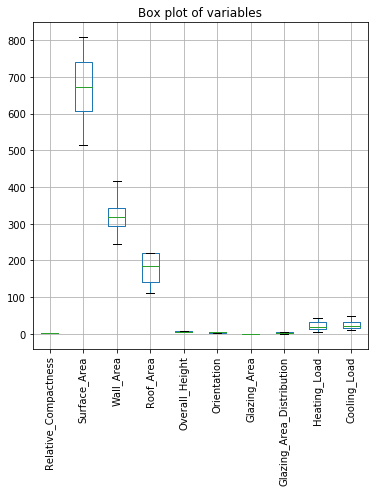

In [11]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
data.boxplot()
plt.xticks(rotation=90) # move to vertical axes so we can see labels
ax.set_title('Box plot of variables') # Give the plot a main title
plt.show()

Do you think it's a good idea to compare variables that aren't on the same scale? 

## Finding Relationships in the data

Let's take another look at the variables in the dataset. 

Remember our goal: The efficiency of the building is measured as either heating load or cooling load. Your goal is to find three interesting relationships within the variables which help you understand the energy efficiency of these buildings.

What variables might effect heating/cooling efficiency (heating_load/cooling_load)? 

In [17]:
data.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

First, let's convert Orientation and Glazing Area Distribution to factors so that we can examine their relationship to heating and cooling. 

In [12]:
data.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

In [19]:
data["Orientation"] = data.Orientation.astype("category")

In [20]:
data["Glazing_Area_Distribution"] = data.Glazing_Area_Distribution.astype("category")

In [21]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Pandas categoricals are great for categorical data, allowing you to easily categories to a number, such as: 

Female: 0  
Male: 1

They are also faster as they are coded in bytes and are faster than object dtypes. 

## Correlation
We can use pandas corr() function to create a correlation matrix for our dataset: 

In [36]:
corr = data.corr()
print(corr)

                      Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness          1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                 -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                    -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                    -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                8.277473e-01 -8.581477e-01  2.809757e-01   
Glazing_Area                  1.283986e-17  1.318356e-16 -7.969726e-19   
Heating_Load                  6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling_Load                  6.343391e-01 -6.729989e-01  4.271170e-01   

                         Roof_Area  Overall_Height  Glazing_Area  \
Relative_Compactness -8.688234e-01    8.277473e-01  1.283986e-17   
Surface_Area          8.807195e-01   -8.581477e-01  1.318356e-16   
Wall_Area            -2.923165e-01    2.809757e-01 -7.969726e-19   
Roof_Area             1.000000e+00   -9.725122e-01 -1.381805e

This is a lot easier to visulize as a graph. First we'll try it in matplotlib.

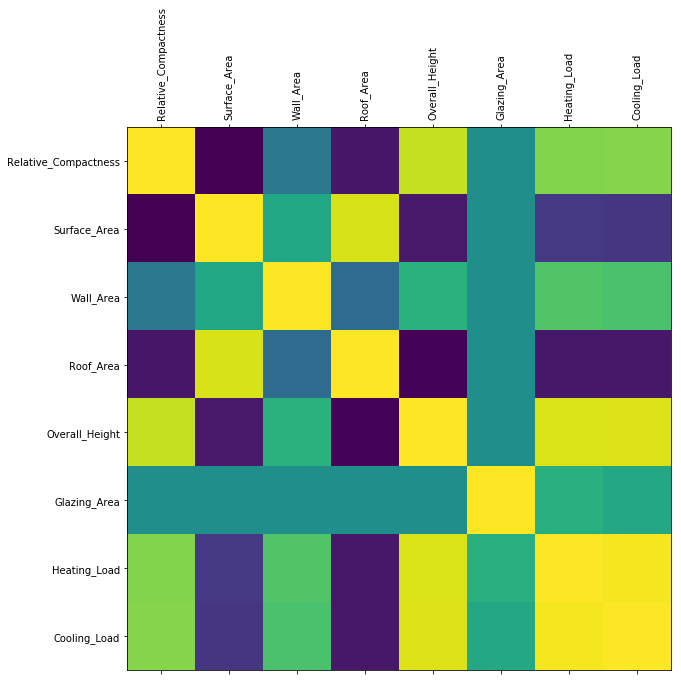

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=90)
plt.show()

The seaborn function adds a legend, which makes it easier to determine which relationship are positive and which are negative. 

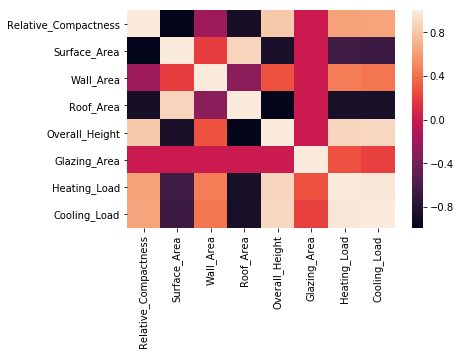

In [32]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Covariance
Similarily, we can use the cov() function to view covariance within the data.

In [40]:
data.cov()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Heating_Load,Cooling_Load
Relative_Compactness,1.118887e-02,-9.242069e+00,-0.940391,-4.150839e+00,1.533246e-01,2.894975e-19,0.664161,0.638331
Surface_Area,-9.242069e+00,7.759164e+03,751.290743,3.503937e+03,-1.323703e+02,-2.223341e-16,-584.941306,-563.966469
Wall_Area,-9.403911e-01,7.512907e+02,1903.269883,-5.759896e+02,2.146545e+01,0.000000e+00,200.586323,177.267243
Roof_Area,-4.150839e+00,3.503937e+03,-575.989570,2.039963e+03,-7.691786e+01,5.558353e-17,-392.763815,-370.616856
Overall_Height,1.533246e-01,-1.323703e+02,21.465450,-7.691786e+01,3.066493e+00,-5.789951e-19,15.715662,14.923005
Glazing_Area,2.894975e-19,-2.223341e-16,0.000000,5.558353e-17,-5.789951e-19,1.774772e-02,0.362726,0.262985
Heating_Load,6.641607e-01,-5.849413e+02,200.586323,-3.927638e+02,1.571566e+01,3.627261e-01,101.812050,93.674064
Cooling_Load,6.383312e-01,-5.639665e+02,177.267243,-3.706169e+02,1.492301e+01,2.629852e-01,93.674064,90.502983


We can use this same syntax to look at the relationship between just a few variables at a time: 

In [44]:
data[['Surface_Area','Heating_Load']].corr()

,Surface_Area,Heating_Load
Surface_Area,1.00000,-0.65812
Heating_Load,-0.65812,1.00000


In [46]:
data[['Surface_Area','Heating_Load']].cov()

,Surface_Area,Heating_Load
Surface_Area,7759.163842,-584.941306
Heating_Load,-584.941306,101.812050
